# Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import matplotlib.patches as mpatches

# Having a first look at the data

In [ ]:
data=pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')

In [ ]:
data.head()

# Visualizations

## Year Wise Distribution of Top Amazon List In Different Genres

In [ ]:
sns.countplot(data['Year'],hue=data['Genre'])
plt.show()

From this we can see that Non Fiction gets into top 50 more than the Fictional Books 

## Price Of Fiction Vs Non Fiction

In [ ]:
plt.hist(data[data['Genre']=='Non Fiction']['Price']);
plt.hist(data[data['Genre']=='Fiction']['Price'])
red_patch = mpatches.Patch(color='orange', label='The Price Of Non Fictional Books');
blue_patch = mpatches.Patch(color='blue', label='The Price Of Fictional Books');
plt.legend(handles=[red_patch,blue_patch])
plt.show()

From this we can observe that the price of non fiction books is higher than price of fictional books :)

I researched some bit and found out the reason of fictional books being lower price range than the non fictional books. We see that fiction books sell more copies than nonfiction books so fictional books lies in a lower price range, in other words, fewer copies are needed to qualify a book for the nonfiction list than the fiction one.

### Comparing Mean Price of Fictional Of The Books and Non Fictional Books

In [ ]:
print('The mean of Non Fictional Books Price is:',data[data['Genre']=='Non Fiction']['Price'].mean())

In [ ]:
print('The mean of the Fictional Books Price is :',data[data['Genre']=='Fiction']['Price'].mean())

## Comparing Ratings Of Fictional And Non Fictional Books

In [ ]:
plt.hist(data[data['Genre']=='Non Fiction']['User Rating']);
plt.hist(data[data['Genre']=='Fiction']['User Rating'])
red_patch = mpatches.Patch(color='orange', label='The User Rating Of Non Fictional Books');
blue_patch = mpatches.Patch(color='blue', label='The User Rating Of Fictional Books');
plt.legend(handles=[red_patch,blue_patch])
plt.show()

From this data we can see that Non Fictional Books recieve the highest number of the User Ratings ..

## Relation Between User Ratings And Reviews

In [ ]:
sns.jointplot(x='User Rating',y='Reviews',data=data,kind='hex',color='Green')

From this we can see that the books with higher Rating have less number of revies except a few and the books with 3.8 - 4.2 ratings are the ones with the highest number of the reviews which shows this data aint normalized .. 

## So Higher Rating Don't mean a lot because books with 4.1 rating have been reviwed by 80000 people but the book with 4.8 rating is reviewed by less than 10000 people so we cant really compare them right now . We might need to get them on the same playing field

# Demographic Filtering

So we will be using Demographic Filtering to get the best ranking score for these books :)
![](https://image.ibb.co/jYWZp9/wr.png)
where,

* v is the number of votes for the book;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the book; And
* C is the mean vote across the whole report


In [ ]:
C=data['User Rating'].mean()
C

So the average of all the books User Rating is 4.6 (approx.) 

Now let's say that the minimum Reviews for a book should be 5000 hence m=5000

In [ ]:
m=5000

In [ ]:
books=data[data['Reviews']>5000]

In [ ]:
# Now let's make a function to find out the weighted rating for all the books
def weighted_rating(x, m=m, C=C):
    v = x['Reviews']
    R = x['User Rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Let's make a new column as score for all the books
score=weighted_rating(books,m=m,C=C)

In [ ]:
books['Score']=score

In [ ]:
# Sorting The Books Data by Score In Descending Order
books=books.sort_values('Score',ascending=False)

In [ ]:
books.head(10)

Haha I can see Dr Seuss has been on top for many years now :)

# Now the data has been ranked and you may know the best of the bestsellers :)

# Hope Ya all liked the file 

# Give an upvote if you liked it :)

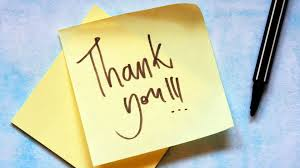